<a href="https://colab.research.google.com/github/jamespradhan/cache-simulation/blob/main/analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
import pandas as pd

# Load results
df = pd.read_csv("cache_comparison_trace4.csv")

# Convert relevant columns to numeric just in case
df["Total Cycles"] = pd.to_numeric(df["Total Cycles"], errors="coerce")
df["L1 Hit Rate (%)"] = pd.to_numeric(df["L1 Hit Rate (%)"], errors="coerce")

# Drop any rows with missing values in these columns
df_clean = df.dropna(subset=["Total Cycles", "L1 Hit Rate (%)"])

# Sort by: 1) Lowest total cycles, 2) Highest L1 hit rate, 3) Mode preference (Multi over Single)
df_sorted = df_clean.sort_values(
    by=["Total Cycles", "L1 Hit Rate (%)", "Mode"],
    ascending=[True, False, True]  # Multi comes before Single alphabetically
)

# Show the best one
best_config = df_sorted.iloc[0]
print("🏆 Best Cache Configuration:")
print(best_config)

🏆 Best Cache Configuration:
Mode                  Multi
L1 Size                1024
L2 Size                4096
Block Size               64
Associativity             4
Policy                  LRU
L1 Hits             5326020
L1 Misses            491474
L2 Hits              304790
L2 Misses            186684
Memory Accesses      186684
Total Accesses      5817494
L1 Hit Rate (%)       91.55
L2 Hit Rate (%)       62.02
Total Cycles       16184170
Name: 67, dtype: object


In [10]:
df_sorted.head(5)

,Mode,L1 Size,L2 Size,Block Size,Associativity,Policy,L1 Hits,L1 Misses,L2 Hits,L2 Misses,Memory Accesses,Total Accesses,L1 Hit Rate (%),L2 Hit Rate (%),Total Cycles
67,Multi,1024,4096,64,4,LRU,5326020,491474,304790,186684,186684,5817494,91.55,62.02,16184170
69,Multi,1024,4096,64,4,Random,5205326,612168,408410,203758,203758,5817494,89.48,66.72,17435276
63,Multi,1024,4096,64,2,Random,5172031,645463,434614,210849,210849,5817494,88.90,67.33,17887551
61,Multi,1024,4096,64,2,LRU,4569549,1247945,1063375,184570,184570,5817494,78.55,85.21,19114924
71,Multi,1024,4096,64,4,FIFO,4858872,958622,735674,222948,222948,5817494,83.52,76.74,19684642


In [11]:
df_sorted.shape

(72, 15)

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

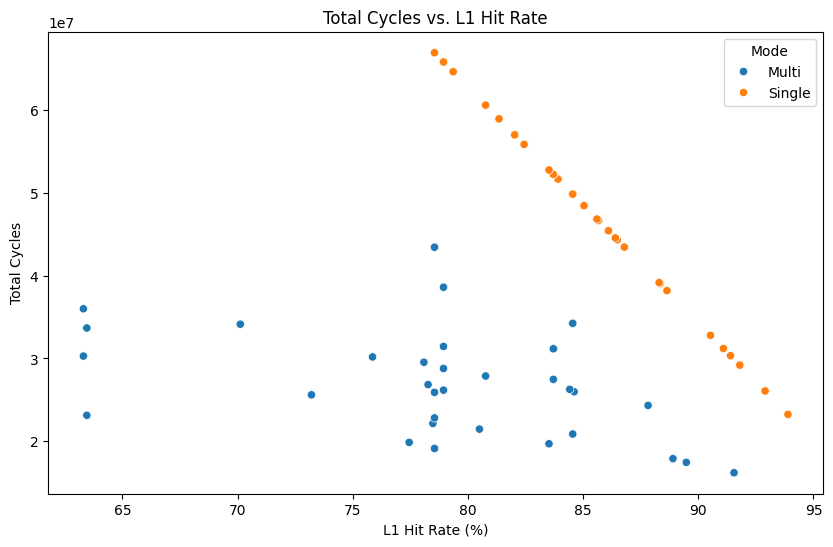

In [13]:
# Scatter plot of Total Cycles vs. L1 Hit Rate
plt.figure(figsize=(10, 6))  # Adjust figure size if needed
sns.scatterplot(x="L1 Hit Rate (%)", y="Total Cycles", hue="Mode", data=df_sorted)
plt.title("Total Cycles vs. L1 Hit Rate")
plt.xlabel("L1 Hit Rate (%)")
plt.ylabel("Total Cycles")
plt.show()



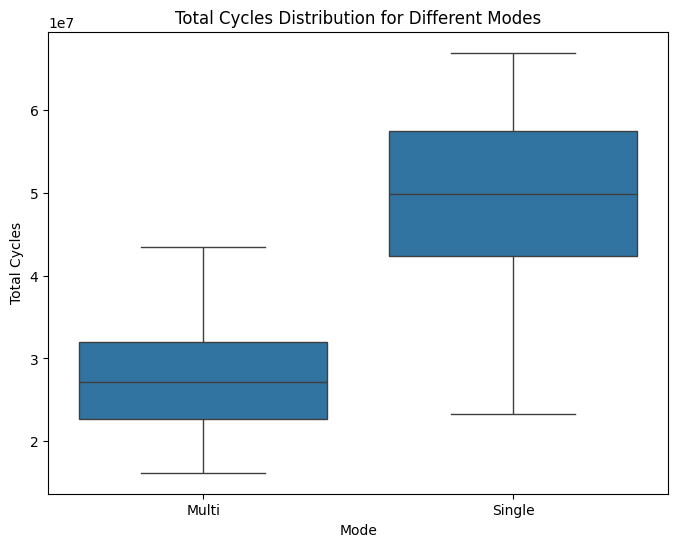

In [14]:
# Box plot of Total Cycles for different Modes
plt.figure(figsize=(8, 6))
sns.boxplot(x="Mode", y="Total Cycles", data=df_sorted)
plt.title("Total Cycles Distribution for Different Modes")
plt.xlabel("Mode")
plt.ylabel("Total Cycles")
plt.show()

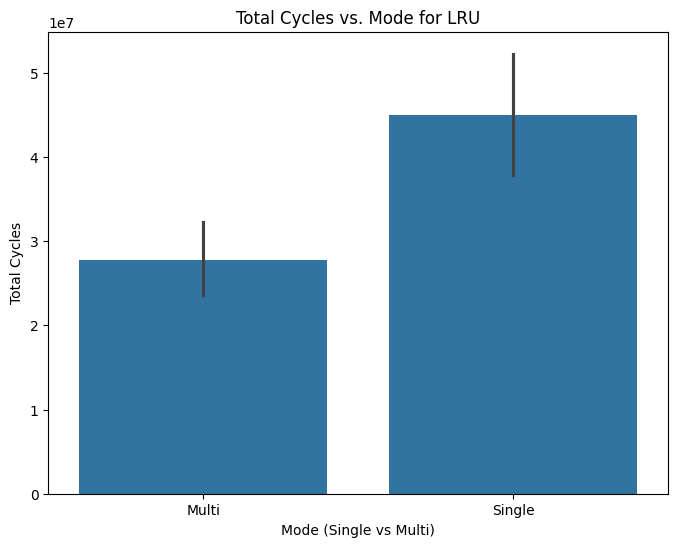

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

# Filter data for LRU
lru_data = df_sorted[df_sorted['Policy'] == 'LRU']

# Create bar plot
plt.figure(figsize=(8, 6))
sns.barplot(x='Mode', y='Total Cycles', data=lru_data)
plt.title('Total Cycles vs. Mode for LRU')
plt.xlabel('Mode (Single vs Multi)')
plt.ylabel('Total Cycles')
plt.show()

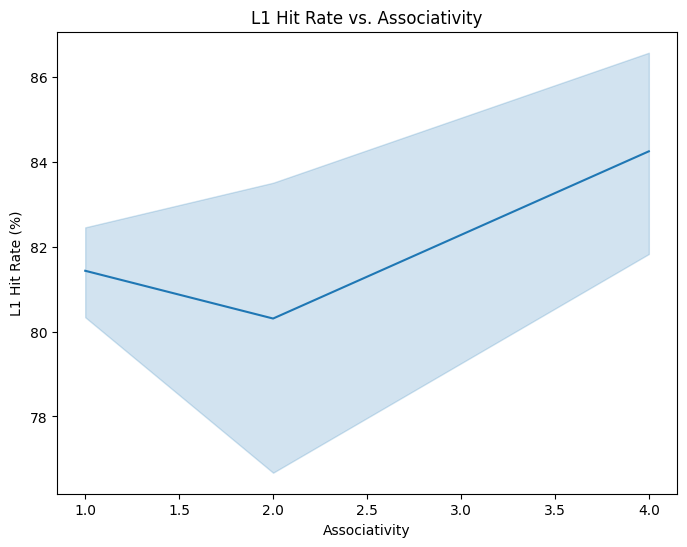

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create line plot
plt.figure(figsize=(8, 6))
sns.lineplot(x='Associativity', y='L1 Hit Rate (%)', data=df_sorted)
plt.title('L1 Hit Rate vs. Associativity')
plt.xlabel('Associativity')
plt.ylabel('L1 Hit Rate (%)')
plt.show()

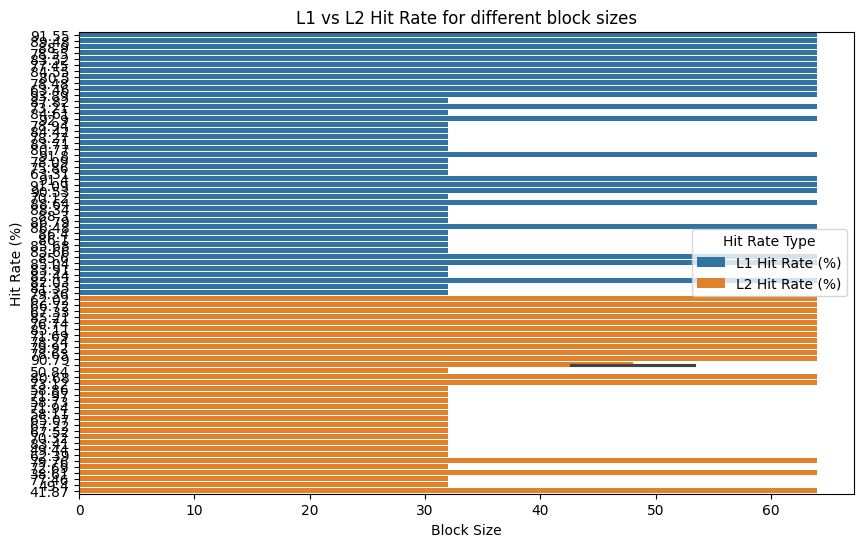

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

# Melt the dataframe to have L1 and L2 hit rates in one column
df_melted = pd.melt(df_sorted, id_vars=['Block Size'], value_vars=['L1 Hit Rate (%)', 'L2 Hit Rate (%)'], var_name='Hit Rate Type', value_name='Hit Rate')

# Create grouped bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x='Block Size', y='Hit Rate', hue='Hit Rate Type', data=df_melted)
plt.title('L1 vs L2 Hit Rate for different block sizes')
plt.xlabel('Block Size')
plt.ylabel('Hit Rate (%)')
plt.legend(title='Hit Rate Type')
plt.show()

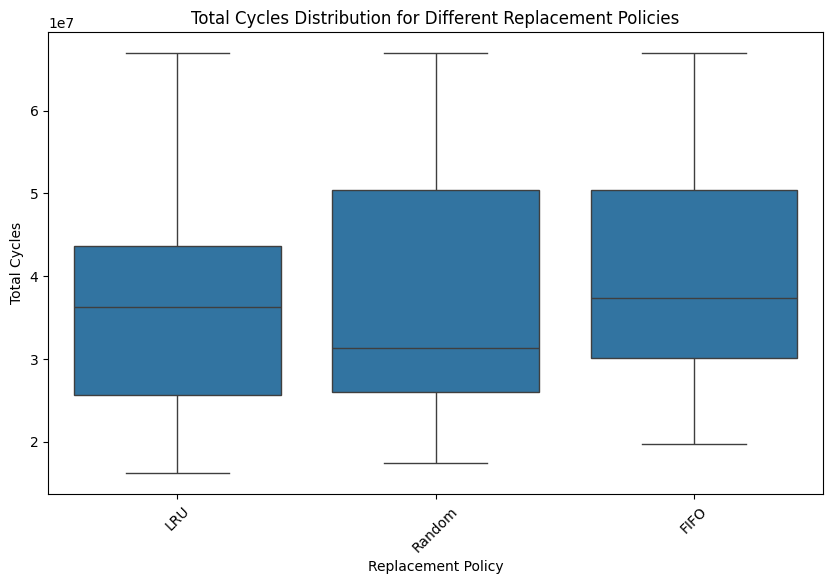

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.boxplot(x="Policy", y="Total Cycles", data=df_sorted)
plt.title("Total Cycles Distribution for Different Replacement Policies")
plt.xlabel("Replacement Policy")
plt.ylabel("Total Cycles")
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()

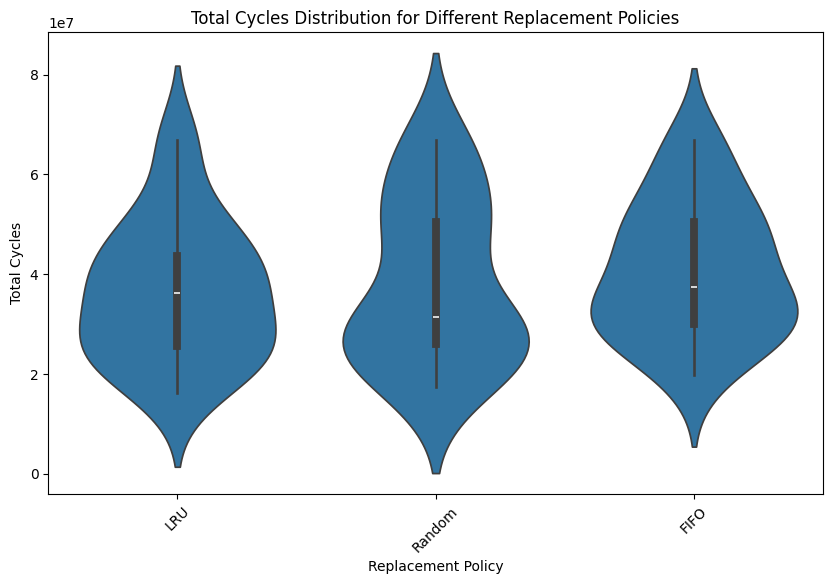

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.violinplot(x="Policy", y="Total Cycles", data=df_sorted)
plt.title("Total Cycles Distribution for Different Replacement Policies")
plt.xlabel("Replacement Policy")
plt.ylabel("Total Cycles")
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()

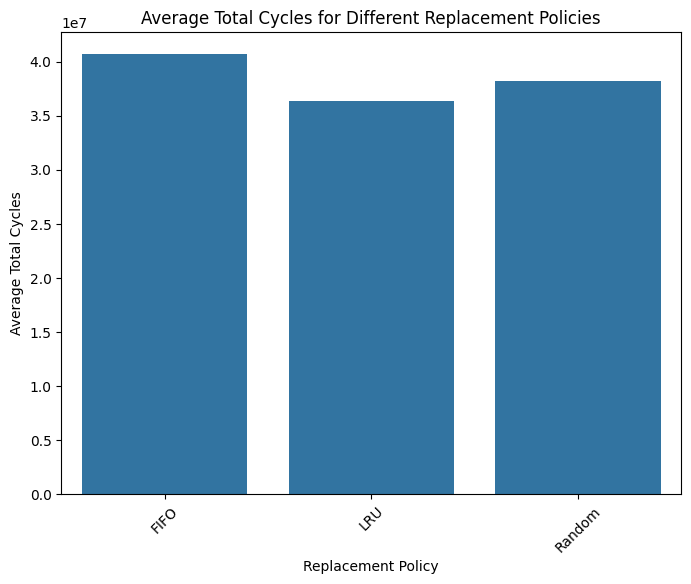

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate average total cycles for each policy
avg_cycles = df_sorted.groupby("Policy")["Total Cycles"].mean().reset_index()

plt.figure(figsize=(8, 6))
sns.barplot(x="Policy", y="Total Cycles", data=avg_cycles)
plt.title("Average Total Cycles for Different Replacement Policies")
plt.xlabel("Replacement Policy")
plt.ylabel("Average Total Cycles")
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()

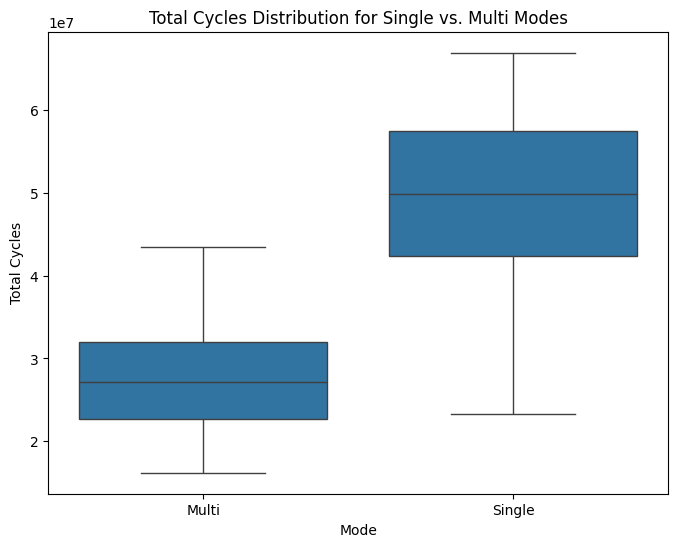

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.boxplot(x="Mode", y="Total Cycles", data=df_sorted)
plt.title("Total Cycles Distribution for Single vs. Multi Modes")
plt.xlabel("Mode")
plt.ylabel("Total Cycles")
plt.show()

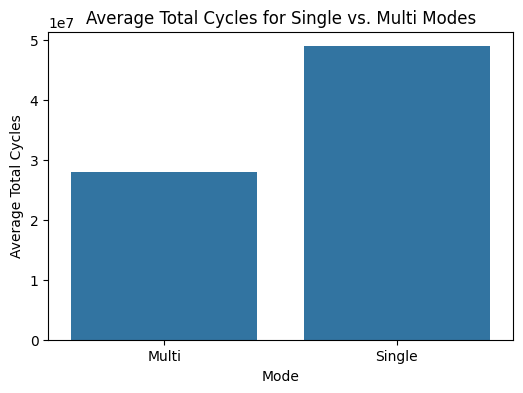

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate average total cycles for each mode
avg_cycles = df_sorted.groupby("Mode")["Total Cycles"].mean().reset_index()

plt.figure(figsize=(6, 4))
sns.barplot(x="Mode", y="Total Cycles", data=avg_cycles)
plt.title("Average Total Cycles for Single vs. Multi Modes")
plt.xlabel("Mode")
plt.ylabel("Average Total Cycles")
plt.show()

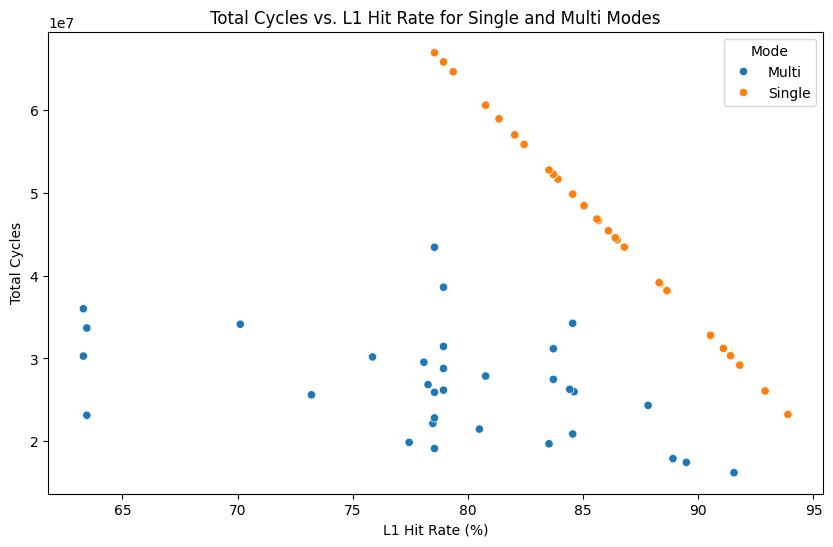

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.scatterplot(x="L1 Hit Rate (%)", y="Total Cycles", hue="Mode", data=df_sorted)
plt.title("Total Cycles vs. L1 Hit Rate for Single and Multi Modes")
plt.xlabel("L1 Hit Rate (%)")
plt.ylabel("Total Cycles")
plt.show()

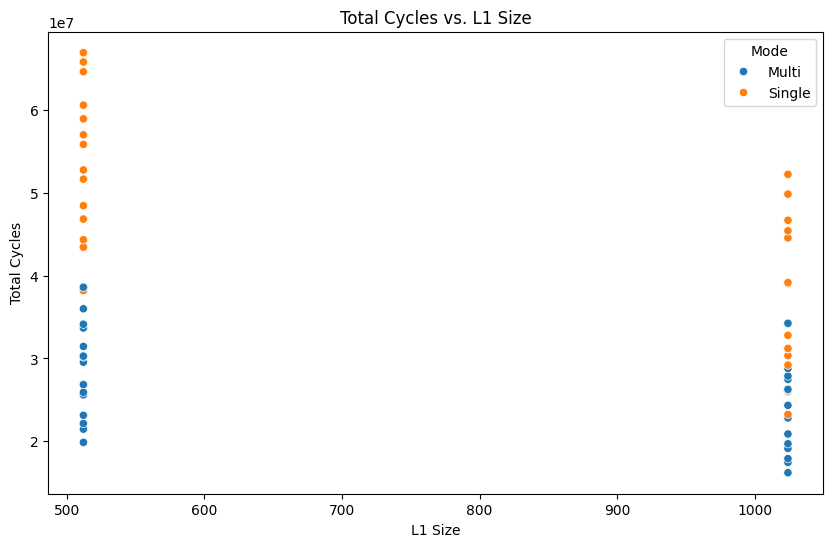

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.scatterplot(x='L1 Size', y='Total Cycles', hue='Mode', data=df_sorted)
plt.title('Total Cycles vs. L1 Size')
plt.xlabel('L1 Size')
plt.ylabel('Total Cycles')
plt.show()

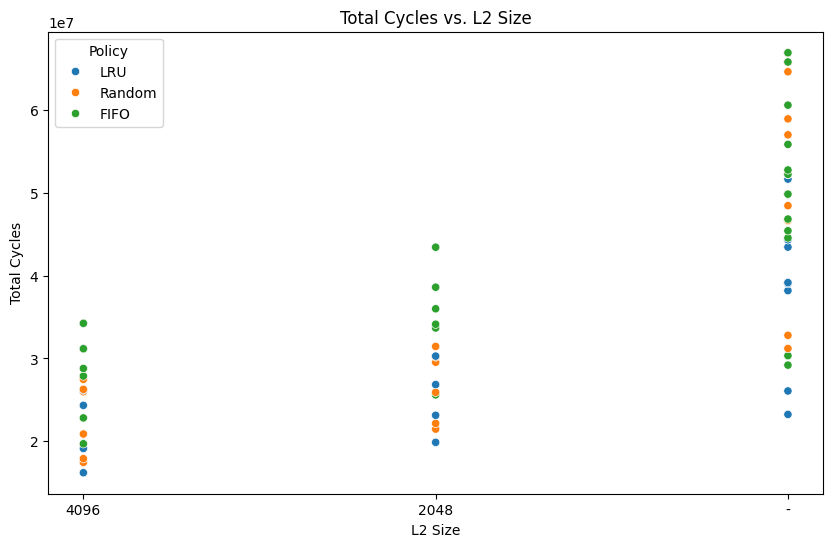

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.scatterplot(x='L2 Size', y='Total Cycles', hue='Policy', data=df_sorted)  # You can change 'hue' to 'Mode' if you prefer
plt.title('Total Cycles vs. L2 Size')
plt.xlabel('L2 Size')
plt.ylabel('Total Cycles')
plt.show()